In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, curve_fit

In [2]:
# import Data
data = np.loadtxt("aufgabe4.dat", skiprows=3)
t_dat = data[:,0]
N_dat = data[:,1]
sigma = np.sqrt(N_dat)

In [3]:
def N_t(t, N_0, N_1, N_2, lambda_1, lambda_2):
    return N_0 + N_1*np.exp(-lambda_1*t) + N_2*np.exp(-lambda_2*t)

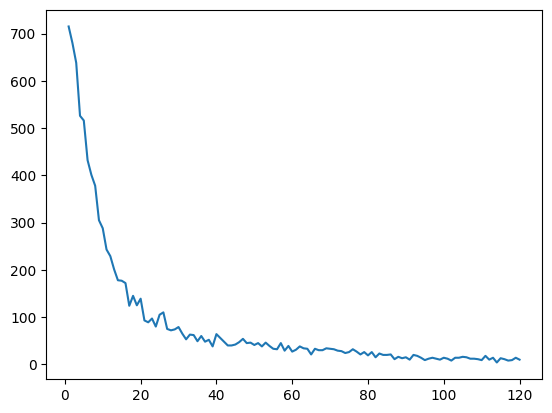

In [4]:
plt.plot(t_dat, N_dat)

In [ ]:
def X_sq(x):
    N_0, N_1, N_2, lambda_1, lambda_2 = x
    frac = (N_dat - N_0 - N_1*np.exp(-lambda_1*t_dat) - N_2*np.exp(-lambda_2*t_dat))/sigma
    return np.sum(frac**2)

x0 = [5,  7.80230889e+02,  2.58923557e+02,  1.23796096e-01,
  2.10641366e-03]

res_DS = minimize(X_sq, x0, method='Nelder-Mead', tol=1e-16)
print("Downhill Simplex:")
print(res_DS.x)
print(X_sq(res_DS.x))

# res_CG = minimize(X_sq, x0, method='CG', tol=1e-10)
# print("Conjugate Gradient:")
# print(res_CG.x)

Downhill Simplex:
[-9.54111687e+00  7.77539088e+02  1.02795651e+02  1.35679085e-01
  1.50564133e-02]
130.62050550505117


In [13]:
popt, pcov = curve_fit(N_t, t_dat, N_dat)
print(popt)
print(X_sq(popt))


[-1.18063214e+02  7.79551876e+02  1.83881075e+02  1.23419563e-01
  3.25869892e-03]
146.16489352536638


/tmp/ipykernel_10968/107891242.py:2: RuntimeWarning: overflow encountered in exp
  return N_0 + N_1*np.exp(-lambda_1*t) + N_2*np.exp(-lambda_2*t)
